# Xlwings

In [30]:
import xlwings as xw
import numpy as np

In [16]:
wb = xw.Book() 

In [17]:
sht = wb.sheets['Sheet1']

In [18]:
sht.range('A1').value = 'Foo 1'

In [19]:
sht.range('A1').value = [
    ['Foo 1', 'Foo 2', 'Foo 3'],
    [10.0, 20.0, 30.0]
]

In [21]:
import pandas as pd
df = pd.DataFrame([[1,2], [3,4]], columns=['a', 'b'])
df

,a,b
0,1,2
1,3,4


In [23]:
sht.range('A1').value = df

In [25]:
sht.range('A5').options(pd.DataFrame, expand='table').value

""


In [26]:
import matplotlib.pyplot as plt

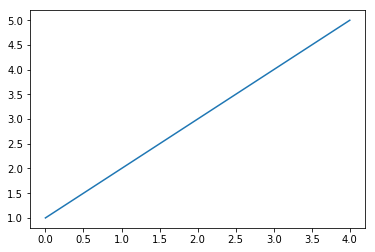

In [27]:
fig = plt.figure()
plt.plot([1, 2, 3, 4, 5])

In [28]:
sht.pictures.add(fig, name='MyPlot', update=True)

<Picture 'MyPlot' in <Sheet [Book4]Sheet1>>

In [31]:
dates = pd.date_range('1/1/2015', periods=1000, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(1000, 4),
                       index=dates,
                       columns=['APPL', 'GOOGLE',
                                'AMAZON', 'MICROSOFT'])
long_df.head()

,APPL,GOOGLE,AMAZON,MICROSOFT
2015-01-07,0.316591,-0.941062,0.825482,-0.510666
2015-01-14,1.530789,-0.013214,-0.149538,0.582940
2015-01-21,0.209937,-0.537044,0.525797,-2.181786
2015-01-28,0.625867,2.413290,-0.895727,1.988141
2015-02-04,-1.158327,0.339440,-0.142827,0.185304


/Users/thomas/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


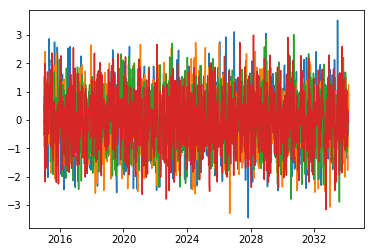

In [33]:
fig = plt.figure()
plt.plot(long_df)

In [34]:
sht.pictures.add(fig, name='MyPlot', update=True)

<Picture 'MyPlot' in <Sheet [Book4]Sheet1>>

In [77]:
dic_ = {'stock': []}

for i in range(0, 100):
    et = np.random.normal()
    dic_['stock'].append(et)
    

In [80]:
dic_['stock'][:10]

[-0.0551741792008205,
 -0.02443827258218747,
 0.5798348347341593,
 2.5608905477450286,
 0.8420342061017925,
 0.12638672958810115,
 1.2685246206382654,
 0.7527099588445937,
 1.7173679395632773,
 -2.263940812017963]

## AR process

$$
y _ { t } = \mu + \gamma y _ { t - 1 } + \epsilon _ { t }
$$

Autoregressive (AR) models are models in which the value of a variable in one period is
related to its values in previous periods.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [116]:
def AR(mu = 95,gamma = 1, lenght = 100, date = '1/1/2019', to_excel = False):
    list_y =[]
    yt_1 = 100
    for i in range(0, lenght):
        et = np.random.normal()
        yt = mu + gamma*yt_1 + et
        yt_1 = yt
        list_y.append(yt)
    ### Plot result
    
    dates = pd.date_range(date,
                          periods=lenght,
                          freq='W-WED')
    
    df_ = pd.DataFrame({'dates': dates, 'Value': list_y}).set_index('dates')
    
    df_mean = df_.groupby([df_.index.month,
                           df_.index.month_name()],
                         ).mean().droplevel(0)
    
    
    if to_excel:
        
        ### Bump time series
        wb = xw.Book() 
        sht = wb.sheets['Sheet1']
        sht.range('A1').value = df_
        
        ### Add mean
        
        sht.range('D1').value = df_mean
        
        ### Add graph
        
        fig = plt.figure()
        plt.plot(df_)
        
        #min_ = 
        
        sht.pictures.add(fig, name='Time series',
                         update=True)
    
    return df_mean

In [118]:
AR(gamma =.98, mu = .5, lenght = 100, to_excel = False)

,Value
dates,
January,68.451689
February,63.188676
March,60.160067
April,55.598519
May,56.104462
June,49.227517
July,46.909087
August,46.480856
September,44.619429
